### Phase-space ellipse

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math 

beta = 1
phi = 1
alpha = 0.5
delta = np.linspace(0, 2*np.pi, 100) # Generates 30 points between 0 and 2Pi
a = np.random.normal(0, 0.5, 100)


y = np.zeros(len(delta))
yp = np.zeros(len(delta))

fig, ax = plt.subplots()

for j in range(len(a)):
    for i in range(len(delta)):
        y[i] = a[j]*math.sqrt(beta)*math.cos(phi-delta[i])
        yp[i] = -a[j]/math.sqrt(beta)*(math.sin(phi-delta[i])+alpha*math.cos(phi-delta[i]))
    ax.plot(y, yp, linestyle = 'None',marker=".", color="b",alpha=0.5)




ax.set(xlabel='y', ylabel='yp',
       title='Phase-space ellipse')
ax.grid()

plt.show()

<Figure size 640x480 with 1 Axes>

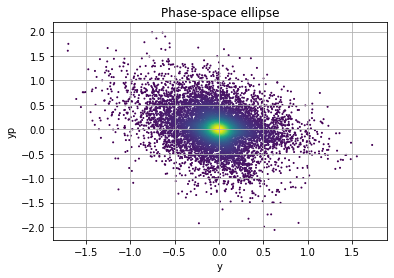

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import gaussian_kde

noparticles = 10000

beta = 1
phi = 1
alpha = 0.5
delta = np.linspace(1, 2*np.pi, noparticles)
a = np.random.normal(0.2, 0.5, noparticles)

y = np.zeros(noparticles)
yp = np.zeros(noparticles)

for i in range(noparticles):
    y[i] = a[i]*math.sqrt(beta)*math.cos(phi-delta[i])
    yp[i] = -a[i]/math.sqrt(beta)*(math.sin(phi-delta[i])+alpha*math.cos(phi-delta[i]))

# Calculate the point density
xy = np.vstack([y,yp])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
y, yp, z = y[idx], yp[idx], z[idx]

fig, ax = plt.subplots()
ax.scatter(y, yp, c=z, s=1) # c color, s= marker size
ax.set(xlabel='y', ylabel='yp', title='Phase-space ellipse')
ax.grid()
plt.show()